In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
DF = pd.read_csv('./data/ten_year.csv')
DF.head()

,type,buy,sell,update
0,PNJ,75.00,73.30,18/06/2024 08:09:01
1,SJC,76.98,74.98,18/06/2024 08:09:01
2,PNJ,75.00,73.30,17/06/2024 08:13:04
3,SJC,76.98,74.98,17/06/2024 08:13:04
4,PNJ,75.10,73.40,15/06/2024 08:09:01


In [56]:
DF['year'] = pd.to_datetime(DF['update']).dt.year
DF['month'] = pd.to_datetime(DF['update']).dt.month
DF['day'] = pd.to_datetime(DF['update']).dt.day
DF['dayofweek'] = pd.to_datetime(DF['update']).dt.dayofweek
DF['hour'] = pd.to_datetime(DF['update']).dt.hour

In [57]:
# after 2014 before 2024
DF = DF[(DF['year'] > 2014) & (DF['year'] < 2024)]
DF

,type,buy,sell,update,year,month,day,dayofweek,hour
966,PNJ,63.30,62.20,30/12/2023 08:11:10,2023,12,30,5,8
967,PNJ,63.30,62.20,30/12/2023 09:12:41,2023,12,30,5,9
968,PNJ,63.10,62.00,30/12/2023 11:15:16,2023,12,30,5,11
969,PNJ,63.10,62.00,30/12/2023 16:39:57,2023,12,30,5,16
970,SJC,76.00,72.50,30/12/2023 08:11:10,2023,12,30,5,8
...,...,...,...,...,...,...,...,...,...
22108,SJC,35.15,34.85,02/01/2015 12:32:50,2015,2,1,6,12
22109,SJC,35.20,35.05,02/01/2015 18:19:50,2015,2,1,6,18
22110,SJC,35.15,34.90,02/01/2015 20:15:21,2015,2,1,6,20
22111,PNJ,32.18,31.98,01/01/2015 15:25:48,2015,1,1,3,15


In [58]:
# Find outliners
q1 = DF['sell'].quantile(0.25)
q3 = DF['sell'].quantile(0.75)
iqr = q3 - q1
outliners = DF[(DF['sell'] < q1 - 1.5*iqr) | (DF['sell'] > q3 + 1.5*iqr)]
outliners

,type,buy,sell,update,year,month,day,dayofweek,hour
16358,SJC,35.65,354.3,10/10/2016 08:29:46,2016,10,10,0,8


In [59]:
outliners['year'].value_counts()

2016    1
Name: year, dtype: int64

In [60]:
outliners_2016 = outliners[outliners['year'] == 2016]
outliners_2016

,type,buy,sell,update,year,month,day,dayofweek,hour
16358,SJC,35.65,354.3,10/10/2016 08:29:46,2016,10,10,0,8


In [61]:
extreme_outliners = DF[(DF['sell'] < q1 - 3*iqr) | (DF['sell'] > q3 + 3*iqr)]
extreme_outliners

,type,buy,sell,update,year,month,day,dayofweek,hour
16358,SJC,35.65,354.3,10/10/2016 08:29:46,2016,10,10,0,8


In [62]:
#drop extreme outliners
DF = DF[(DF['sell'] >= q1 - 3*iqr) & (DF['sell'] <= q3 + 3*iqr)]
DF

,type,buy,sell,update,year,month,day,dayofweek,hour
966,PNJ,63.30,62.20,30/12/2023 08:11:10,2023,12,30,5,8
967,PNJ,63.30,62.20,30/12/2023 09:12:41,2023,12,30,5,9
968,PNJ,63.10,62.00,30/12/2023 11:15:16,2023,12,30,5,11
969,PNJ,63.10,62.00,30/12/2023 16:39:57,2023,12,30,5,16
970,SJC,76.00,72.50,30/12/2023 08:11:10,2023,12,30,5,8
...,...,...,...,...,...,...,...,...,...
22108,SJC,35.15,34.85,02/01/2015 12:32:50,2015,2,1,6,12
22109,SJC,35.20,35.05,02/01/2015 18:19:50,2015,2,1,6,18
22110,SJC,35.15,34.90,02/01/2015 20:15:21,2015,2,1,6,20
22111,PNJ,32.18,31.98,01/01/2015 15:25:48,2015,1,1,3,15


In [63]:
DF['ROC'] = DF['sell'].pct_change()
DF

<ipython-input-63-7aaeaed1b336>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['ROC'] = DF['sell'].pct_change()


,type,buy,sell,update,year,month,day,dayofweek,hour,ROC
966,PNJ,63.30,62.20,30/12/2023 08:11:10,2023,12,30,5,8,NaN
967,PNJ,63.30,62.20,30/12/2023 09:12:41,2023,12,30,5,9,0.000000
968,PNJ,63.10,62.00,30/12/2023 11:15:16,2023,12,30,5,11,-0.003215
969,PNJ,63.10,62.00,30/12/2023 16:39:57,2023,12,30,5,16,0.000000
970,SJC,76.00,72.50,30/12/2023 08:11:10,2023,12,30,5,8,0.169355
...,...,...,...,...,...,...,...,...,...,...
22108,SJC,35.15,34.85,02/01/2015 12:32:50,2015,2,1,6,12,0.000000
22109,SJC,35.20,35.05,02/01/2015 18:19:50,2015,2,1,6,18,0.005739
22110,SJC,35.15,34.90,02/01/2015 20:15:21,2015,2,1,6,20,-0.004280
22111,PNJ,32.18,31.98,01/01/2015 15:25:48,2015,1,1,3,15,-0.083668


<Axes: xlabel='month'>

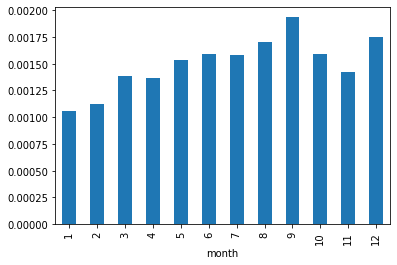

In [64]:
# what month is the best to buy?
df3 = DF.groupby('month')['ROC'].mean()
df3.to_csv('./output/3.csv',index=True)
df3.plot(kind='bar')